In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('IRFC.NS_stock_data.csv')

# Display the first few rows of the dataset

data.head()

C:\Users\kiran\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
0,2021-01-29,24.900000,25.799999,24.350000,24.799999,21.363667,381938573,IRFC.NS
1,2021-02-01,25.250000,25.400000,24.900000,25.100000,21.622095,72044464,IRFC.NS
2,2021-02-02,25.450001,25.450001,24.700001,24.750000,21.320593,36735442,IRFC.NS
3,2021-02-03,24.799999,24.900000,24.049999,24.250000,20.889874,45816269,IRFC.NS
4,2021-02-04,24.250000,25.799999,23.850000,25.350000,21.837458,88486029,IRFC.NS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Check the columns of the dataset
print(data.columns)
data.head()

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'adjclose', 'volume',
       'ticker'],
      dtype='object')


,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
0,2021-01-29,24.900000,25.799999,24.350000,24.799999,21.363667,381938573,IRFC.NS
1,2021-02-01,25.250000,25.400000,24.900000,25.100000,21.622095,72044464,IRFC.NS
2,2021-02-02,25.450001,25.450001,24.700001,24.750000,21.320593,36735442,IRFC.NS
3,2021-02-03,24.799999,24.900000,24.049999,24.250000,20.889874,45816269,IRFC.NS
4,2021-02-04,24.250000,25.799999,23.850000,25.350000,21.837458,88486029,IRFC.NS


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  801 non-null    object 
 1   open        801 non-null    float64
 2   high        801 non-null    float64
 3   low         801 non-null    float64
 4   close       801 non-null    float64
 5   adjclose    801 non-null    float64
 6   volume      801 non-null    int64  
 7   ticker      801 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 50.2+ KB


In [4]:
#data = data.rename(columns = {"Date time " : "Unnamed: 0"}, inplace = True )

In [5]:
#data = data.rename(columns = {"Unnamed: 0 " : "Date"}, inplace = True )

In [6]:
data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

In [7]:

# Use 'Close' price for prediction
data = data[['Date','close']]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    801 non-null    object 
 1   close   801 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.6+ KB


In [9]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])



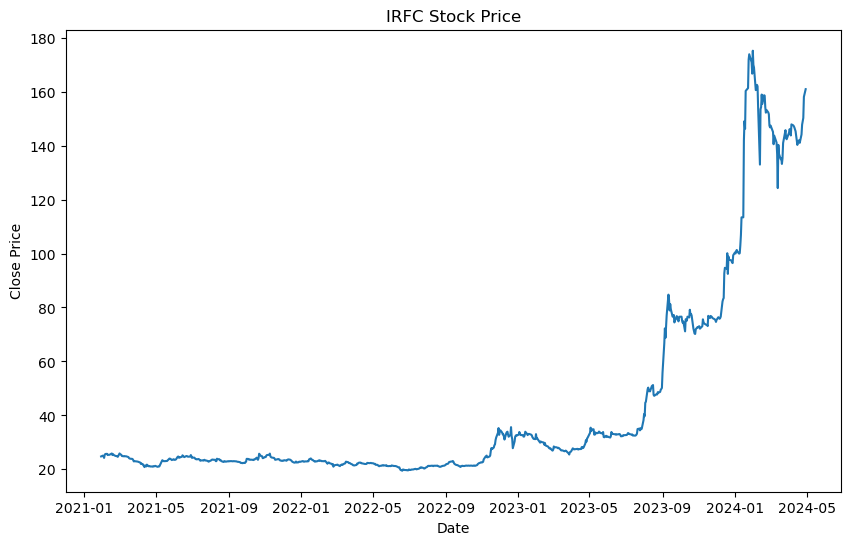

In [10]:
# Sort by date
data.sort_values('Date', inplace=True)

# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('IRFC Stock Price')
plt.show()

In [11]:

# Prepare data for training
data['close'] = data['close'].astype(float)


In [12]:

# Create features and target variable
X = data[['close']]
y = data['close']


In [13]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [14]:


# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:

# Convert to numpy arrays for model compatibility
X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Reshape data for LSTM model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [17]:


# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train_scaled.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



C:\Users\kiran\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [19]:

# Train the model
model.fit(X_train_scaled, y_train, batch_size=1, epochs=1)


640/640 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 256.5046


In [20]:

# Make predictions
predictions = model.predict(X_test_scaled)
predictions = scaler.inverse_transform(predictions)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


RMSE: 2226.1062940007346


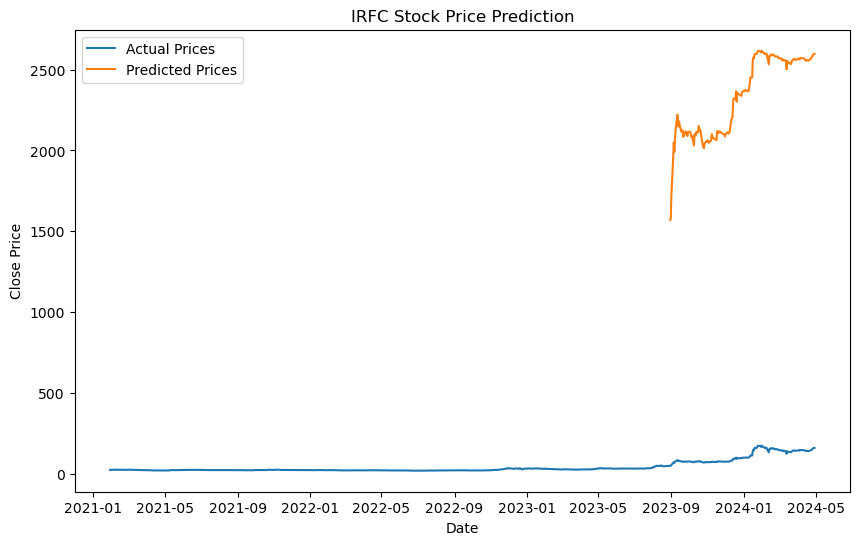

In [21]:
import math
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['close'], label='Actual Prices')
plt.plot(data['Date'].iloc[-len(predictions):], predictions, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('IRFC Stock Price Prediction')
plt.legend()
plt.show()


In [22]:
import pickle

# Save the model
model.save('lstm_model.h5')

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
